In [1]:
# make necessary imports
import torch
import utils
import transformer
import os
from torchvision import transforms
import time
#import cv2

In [4]:
# set configuration
STYLE_TRANSFORM_PATH = "transforms/starry.pth"  # path to the style transform model
PRESERVE_COLOR = False  # set to True if you want to preserve original image colors

Input image: 


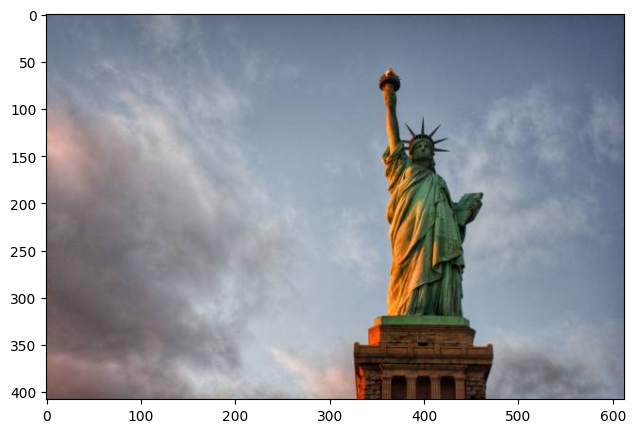

Using device: cuda
Loading transformer network...
Loading content image: images/input/img1.jpg
Generating stylized image...
Transfer Time: 0.01 seconds
Stylized image saved to: images/results/stylized_output2.jpg 

Output image: 


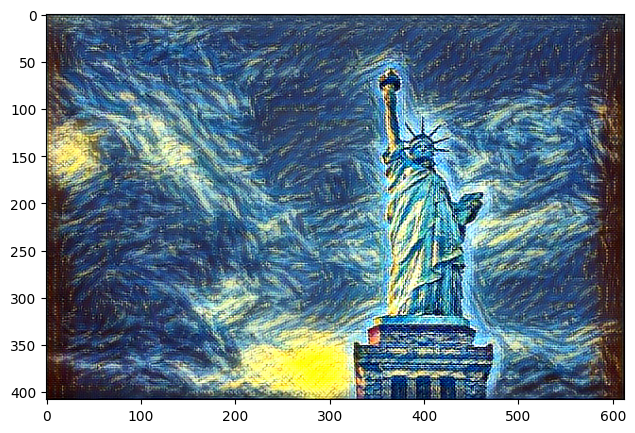

In [5]:
# function to perform image stylization!
def stylize_image(content_image_path, output_path):
    """
    Stylize a single image
    
    Args:
        content_image_path: Path to the content image to stylize
        output_path: Path to save the stylized image
    """
    # device
    device = ("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # load Transformer Network
    print("Loading transformer network...")
    net = transformer.TransformerNetwork()
    net.load_state_dict(torch.load(STYLE_TRANSFORM_PATH))
    net = net.to(device)
    
    # process image
    print(f"Loading content image: {content_image_path}")
    content_image = utils.load_image(content_image_path)
    
    # transform and generate
    print("Generating stylized image...")
    start_time = time.time()
    content_tensor = utils.itot(content_image).to(device)
    generated_tensor = net(content_tensor)
    generated_image = utils.ttoi(generated_tensor.detach())
    
    if PRESERVE_COLOR:
        print("Preserving original colors...")
        generated_image = utils.transfer_color(content_image, generated_image)
    
    # save and display
    transfer_time = time.time() - start_time
    print(f"Transfer Time: {transfer_time:.2f} seconds")
    
    utils.saveimg(generated_image, output_path)
    print(f"Stylized image saved to: {output_path} \n")
    
    return generated_image

if __name__ == "__main__":
    # input image path
    content_path = "images/input/img1.jpg"
    content_image = utils.load_image(content_path)
    
    output_path = "images/results/stylized_output2.jpg"
    
    # show input image
    print("Input image: ")
    utils.show(content_image)
    
    # generate stylized image
    stylized = stylize_image(content_path, output_path)
    
    # display the image
    print("Output image: ")
    utils.show(stylized)